# Alcohol Consumption in Russia

![Alcoholic Beverages in Russia](images/drinks.png)
            Source: [The Russian alcohol market: a heady cocktail](http://www.food-exhibitions.com/Market-Insights/Russia/The-Russian-alcohol-market)

## Project Motivation

A fictitious company owns a chain of stores across Russia that sell a variety of types of alcohol. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful and need help determining which regions they should select.

![Regions in Russia](images/regions.png)
        Source: [Outline of Russia](https://en.wikipedia.org/wiki/Outline_of_Russia)
        
This project aims to use machine learning algorithm to recommend, at least 10 regions with alcohol buying habits similar to Saint Petersburg. 

## The Dataset

The data used in this project is obtained from [Datacamp's Career Hub repository](https://github.com/datacamp/careerhub-data) on GitHub. It contains 7 variables as see in the description below:

![Description of dataset](images/data_description.png)

## Analysis Plan

Based on the ask of the project, the problem is best solved using an unsupervied machine learning algorithm that could best cluster regions based on wine sales in Saint Petersburg. Selection of this algorithm will be done in subsequent sections.

The following steps will be followed:

- Perform Exploratory Data Analysis to identify patters and draw insights from the data.
- Select a suitable unsupervised machine learning algorithm based on problem to solve and information from the exploratory data analysis.
- Discuss model performance.

### Exploratory Data Analysis

This section will explore the data to discover trends and insights. It will be done by creating plots of features against their values. The following steps will be implemented:

- Read data
- Check for data quality issues.
- Clean and transform data into a suitable format for exploration.
- Data Visualization to observe patterns and trends.

In [1]:
# import system and exploratory analysis modules
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy as np; print("Numpy", np.__version__)
import matplotlib
import matplotlib.pyplot as plt; print("Matplotlib", matplotlib.__version__)
import pandas as pd; print("Pandas", pd.__version__)
import seaborn as sns; print("Seaborn", sns.__version__)
import scipy; print("Scipy", scipy.__version__)
import sklearn; print("Scikit -Learn", sklearn.__version__)
import funcs

Windows-10-10.0.19041-SP0
Python 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
Numpy 1.19.2
Matplotlib 3.3.2
Pandas 1.1.5
Seaborn 0.11.1
Scipy 1.5.2
Scikit -Learn 0.23.2


In [2]:
# set theme for seaborn
sns.set_style('whitegrid')
sns.set(font_scale = 1)

### Read and check data for quality issues

A function us created to do the following:
- Read the data
- Drop duplicates
- Create a list of feature names
- Create a containing data types and nulls.

In [3]:
# # function to read data, check for nulls and drop duplicates
# def read_data(data_path):
#     # read data
#     print("Reading Alcohol Consumption in Russia dataset\n")
#     df = pd.read_csv(data_path)
#     # make a copy of dataframe
#     print("Making a copy of the dataframe\n")
#     df_1 = df.copy()
#     # drop duplicates
#     df_final = df_1.drop_duplicates()
#     # extract feature names
#     df_cols = df_final.columns.tolist()
#     print("Data consists of:\n")
#     print("...........................\n")
#     print("Rows: {}\n".format(len(df_final)))
#     print("Columns: {}\n".format(len(df_cols)))
#     print("...........................\n")
#     # empty list to hold data types, non nulss count, nulss count, percentage of nulls in a column,\
#     # percentage of column nulls in datafram
#     data_types = []
#     non_nulls = []
#     nulls = []
#     null_column_percent = []
#     null_df_percent = []
    
#     # loop through columns and capture the variables above
#     print("Extracting count and percentages of nulls and non nulls")
#     for col in df_cols:
        
#         # extract null count
#         null_count = df_final[col].isna().sum()
#         nulls.append(null_count)
        
#         # extract non null count
#         non_null_count = len(df_final) - null_count
#         non_nulls.append(non_null_count)
        
#         # extract % of null in column
#         col_null_perc = 100 * null_count/len(df_final)
#         null_column_percent.append(col_null_perc)
        
#         # extract % of nulls out of total nulls in dataframe
#         df_null_perc = 100 * null_count/df_final.isna().sum().sum()
#         null_df_percent.append(df_null_perc)
        
#         # capture data types
#         data_types.append(df_final[col].dtypes) 
        
#     # create zipped list with column names, data_types, nulls and non nulls
#     lst_data = list(zip(df_cols, data_types, non_nulls, nulls, null_column_percent, null_df_percent))
#     # create dataframe of zipped list
#     df_zipped = pd.DataFrame(lst_data, columns = ['Feature', 'DataType', 'CountOfNonNulls', 'CountOfNulls',\
#                                                  'PercentOfNullsIinColumn', 'PercentOfNullsInData'])
#     return df_final, df_cols, df_zipped

In [4]:
path = 'alcohol-consumption-in-russia.csv'
# df, features, df_QA = read_data(path)

In [5]:
df, df_cols, df_nulls = funcs.read_data(path)

Making a copy of the dataframe

Data consists of:

...........................

Rows: 1615

Columns: 7

...........................

Extracting count and percentages of nulls and non nulls


In [6]:
# inspect first 5 rows of data
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [7]:
# check for quality issues in data
df_nulls

,Feature,DataType,CountOfNonNulls,CountOfNulls,PercentOfNullsIinColumn,PercentOfNullsInData
0,year,int64,1615,0,0.000000,0.000000
1,region,object,1615,0,0.000000,0.000000
2,wine,float64,1552,63,3.900929,20.257235
3,beer,float64,1557,58,3.591331,18.649518
4,vodka,float64,1554,61,3.777090,19.614148
5,champagne,float64,1552,63,3.900929,20.257235
6,brandy,float64,1549,66,4.086687,21.221865


In [8]:
# summary statistics for numerical features
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


In [9]:
# numerical data
df.describe(exclude = 'number')

,region
count,1615
unique,85
top,Kamchatka Krai
freq,19


As can be observed above, the dataset consists of 1615 rows and 7 columns. Region is the only column of type object. Also, we can tell that there are missing values in all the columns containing data of the alcoholic beverages. Noteably, Brandy has the most missing values, about 21.2% of total nulls in data. We will handle missing values in the cleaning and transformation sections. 

The summary statistics gave us an overview of basic statistical properties. We can tell that the data contains sales per capita records from the 2002 to 1998. There are 85 regions covered and Kamchatka Krai is the most frequent among region values.

### Clean and Transform Data

The data is relatively clean based on our observation from inspection section. We will handle missing values by imputing the mean of values in each beverage column and also, strip leading and trailing spaces in region column.

A function is created to perform the cleaning and transformation processes stated above.

In [10]:
# # function to clean and transform data
# def clean_and_transform(data, cols):
#     # loop through columns and fillna with mean values
#     # strip leading and trailing spaces in text data
#     for col in cols:
#         if data[col].dtypes == 'int64' or data[col].dtypes == 'int32' or data[col].dtypes == 'float64':
#             data[col] = data[col].fillna(data[col].mean())
#         elif data[col].dtypes == 'object':
#             data[col] = data[col].apply(lambda x: x.strip())
#     return data

In [11]:
# clean and transform data
df_clean = funcs.clean_and_transform(df)

In [12]:
# inspect data again for quality issues
df_clean.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


### Visualizations

Visualizing the data will aid in identifying patterns and relationships among the features. For this project, we will create the following plots:
- Time series of sales data.
- Regional Sales.
- Correlation of numerical features.

We will also create a function for some of these plots.

In [13]:
# function to create time series plots
def plot_features(data, grp_v_single_region, grp_v_single_bev):
    # aggregate data by year and region
    df_grp = data.groupby(['year', 'region'], as_index = False)[['wine', 'beer', 'vodka', 'champagne', 'brandy']].mean()
     # melt data frame - wide to long
    df_melt = pd.melt(df_grp, id_vars = ['year', 'region'], value_vars = ['wine', 'beer', 'vodka', 'champagne', 'brandy'],\
                         var_name = 'beverages', value_name = 'Sales per Capita')
    df_melt['year'] = df_melt['year'].astype('int64')
    
    # plot time series for all regions and all beverages
    if grp_v_single_region == 'all regions' and grp_v_single_bev == 'all beverages':
        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        sns.set_context('poster', font_scale = 0.5, rc = {'grid.linewidth': 0.5})
        sns.lineplot(data = df_melt, x = 'year', y = 'Sales per Capita', hue = 'beverages',\
                     style = 'beverages', markers = True)
        plt.title("Time Series of Mean Sales per Capita for all beverages")
        plt.savefig("images/{}_{}_regions".format(grp_v_single_region.strip(), grp_v_single_bev.strip()))
        plt.show()
    # plot time series for a region and all beverages
    elif grp_v_single_region in df_melt['region'].unique().tolist()\
    and grp_v_single_bev == 'all beverages':
        df_plot = df_melt.loc[df_melt['region'] == grp_v_single_region]    
        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        sns.set_context('poster', font_scale = 0.5, rc = {'grid.linewidth': 0.5})
        sns.lineplot(data = df_plot, x = 'year', y = 'Sales per Capita', hue = 'beverages',\
                     style = 'beverages', markers = True)
        plt.title("Time Series of Mean Sales per Capita of all Beverages in {}".format(grp_v_single_region))
        plt.savefig("images/{}_{}_regions".format(grp_v_single_region.strip(), grp_v_single_bev.strip()))
        plt.show()
    # plot time series for a region and a beverage
    elif grp_v_single_region in df_melt['region'].unique().tolist()\
    and grp_v_single_bev in  df_melt['beverages'].unique().tolist():
        df_plot = df_melt.loc[(df_melt['region'] == grp_v_single_region) & (df_melt['beverages'] == grp_v_single_bev)]    
        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        sns.set_context('poster', font_scale = 0.5, rc = {'grid.linewidth': 0.5})
        sns.lineplot(data = df_plot, x = 'year', y = 'Sales per Capita', hue = 'beverages',\
                     style = 'beverages', markers = False)
        plt.title("Time Series of Mean Sales per Capita of {} in {}".format(grp_v_single_bev, grp_v_single_region))
        plt.savefig("images/{}_{}_regions".format(grp_v_single_region.strip(), grp_v_single_bev.strip()))
        plt.show()
    # plot time series for all region and a beverage
    elif grp_v_single_region == 'all regions' and grp_v_single_bev in  df_melt['beverages'].unique().tolist():
        df_plot = df_melt.loc[df_melt['beverages'] == grp_v_single_bev]    
        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        sns.set_context('poster', font_scale = 0.5, rc = {'grid.linewidth': 0.5})
        sns.lineplot(data = df_plot, x = 'year', y = 'Sales per Capita', hue = 'beverages',\
                     style = 'beverages', markers = False)
        plt.title("Time Series of Mean Sales per Capita of {} in {}".format(grp_v_single_bev,\
                                                                            grp_v_single_region))
        plt.savefig("images/{}_{}_regions".format(grp_v_single_region.strip(), grp_v_single_bev.strip()))
        plt.show()

In [14]:
df_grp, df_melt = funcs.group_melt(df_clean, year = 'year', region = 'region')

In [15]:
df_grp_reg, df_melt_reg = funcs.group_melt(df_clean, region = 'region')

In [16]:
df_melt_reg.head()

,region,beverages,Sales per Capita
0,Altai Krai,wine,3.174211
1,Altai Republic,wine,5.190000
2,Amur Oblast,wine,5.221579
3,Arkhangelsk Oblast,wine,8.670000
4,Astrakhan Oblast,wine,4.469474


In [17]:
wine_melt = df_melt_reg.loc[df_melt_reg['beverages'] == 'wine']
wine_melt.head()

,region,beverages,Sales per Capita
0,Altai Krai,wine,3.174211
1,Altai Republic,wine,5.190000
2,Amur Oblast,wine,5.221579
3,Arkhangelsk Oblast,wine,8.670000
4,Astrakhan Oblast,wine,4.469474


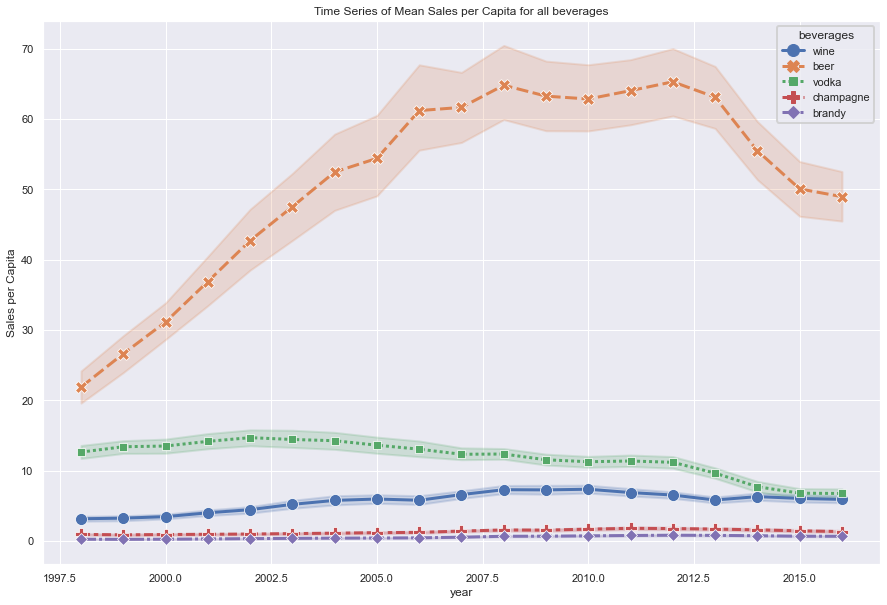

In [18]:
# Time series beverage sales
funcs.plot_timeseries(df_melt, region = 'all regions', beverage = 'all beverages')

The time series plot above indicates that beer had the highest sales over year even though sales decreased from 2012 to 2015. On the other hand, our product of interest, wine, saw a gradual increase in sales starting from 2002. Vodka also experienced gradual drop in sales. There is minimal sales increase for champagne and brandy.

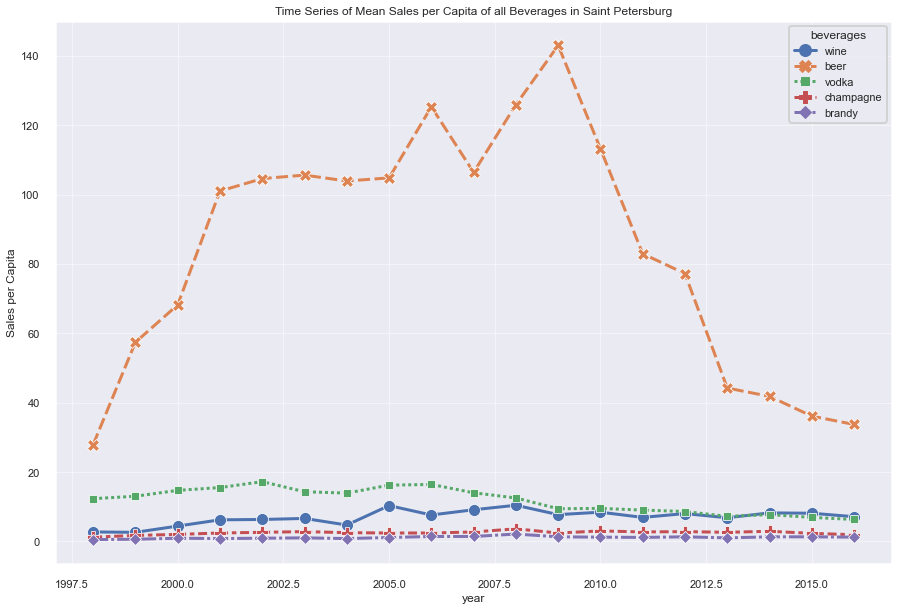

In [19]:
# time series for Saint Petersburg
funcs.plot_timeseries(df_melt, region = 'Saint Petersburg', beverage = 'all beverages')
# funcs.plot_timeseries(df_melt, 'Saint Petersburg', 'wine')
# plot_features(df_clean, 'all regions', 'brandy')

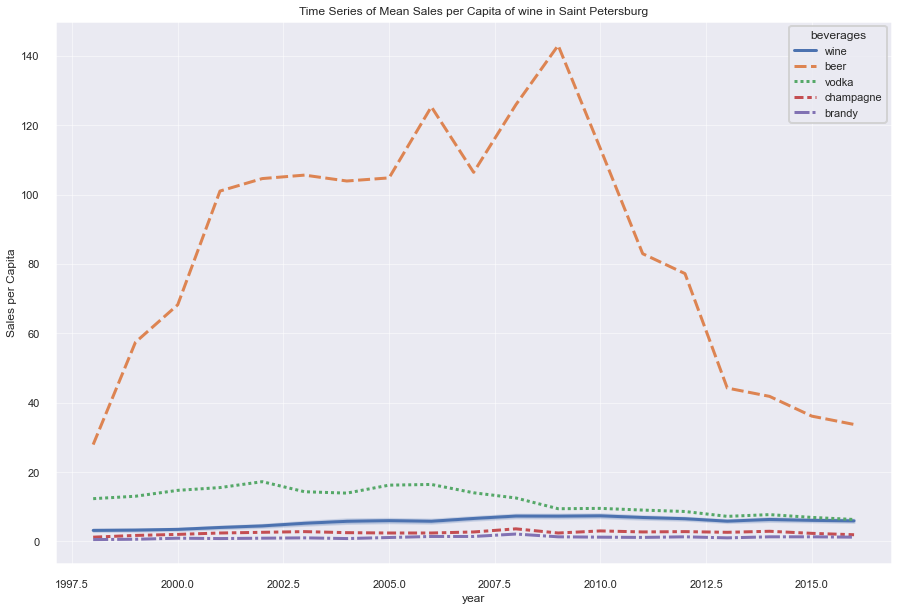

In [20]:
funcs.plot_timeseries(df_melt, region = 'Saint Petersburg', beverage = 'wine')

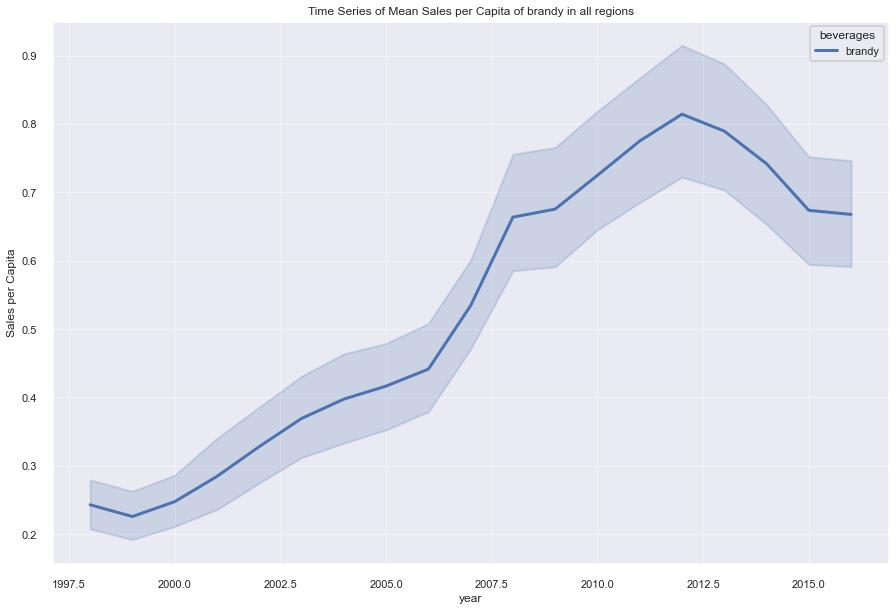

In [21]:
funcs.plot_timeseries(df_melt, region = 'all regions', beverage = 'brandy')

Sales in Saint Petersburg follows same trend as combined regions. Zooming in on wine, we can see a leap between 2004 and 2005 followed by fluctuating sales up to 2015.

In [22]:
# function to explore categorial variables and rank sales
def cat_plot(data, plot, **kwargs):
    grp_v_single_region = kwargs.get('grp_v_single_region', None)
    grp_v_single_bev = kwargs.get('grp_v_single_bev', None)
    top = kwargs.get('top', None)
    bottom = kwargs.get('bottom', None)
    n = kwargs.get('n', None)
    # aggregate data by region
    df_grp = data.groupby('region', as_index = False)[['wine', 'beer', 'vodka', 'champagne', 'brandy']].mean()
     # melt data frame - wide to long
    df_melt = pd.melt(df_grp, id_vars =['region'], value_vars = ['wine', 'beer', 'vodka', 'champagne', 'brandy'],\
                         var_name = 'beverages', value_name = 'Sales per Capita')
    if plot == 'boxplot':
        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        sns.set_context('poster', font_scale = 0.5, rc = {'grid.linewidth': 0.5})
        sns.boxplot(x = 'Sales per Capita', y = 'beverages', data = df_melt)
        sns.despine(offset = 20, trim = True)
        plt.title('Distribution of Mean Sales per Capita by Beverage')
        plt.savefig("images/Distribution Plot of Sales by Beverage.png")
        plt.show()
    
    elif plot == 'catplot':
        if (top and n):
            sort_df = df_melt.sort_values(by = ['Sales per Capita'], ascending = False)
            top_n = sort_df.iloc[:n, :]
            fig, ax = plt.subplots()
            fig.set_size_inches(15, 10)
            sns.set_context('poster', font_scale = 0.5, rc = {'grid.linewidth': 0.5})
            sns.barplot(x = 'Sales per Capita', y = 'region', hue = 'beverages', data = top_n)
            sns.despine(offset = 10, trim = True)
            plt.title('{} {} Regions by Mean Sales per Capita'.format(top, n))
            plt.savefig("images/{}_{}_regions.png".format(top.lower(), n))
            plt.show()
        elif (bottom and n):
            sort_df = df_melt.sort_values(by = ['Sales per Capita'], ascending = True)
            bottom_n = sort_df.iloc[:n, :]
            fig, ax = plt.subplots()
            fig.set_size_inches(15, 10)
            sns.set_context('poster', font_scale = 0.5, rc = {'grid.linewidth': 0.5})
            sns.barplot(x = 'Sales per Capita', y = 'region', hue = 'beverages', data = bottom_n)
            sns.despine(offset = 10, trim = True)
            plt.title('{} {} Regions by Mean Sales per Capita'.format(bottom, n))
            plt.savefig("images/{}_{}_regions".format(bottom.lower(), n))
            plt.show()

In [23]:
# Top sales by Region
# cat_plot(df_clean, 'catplot', top = 'Top', n = 10)

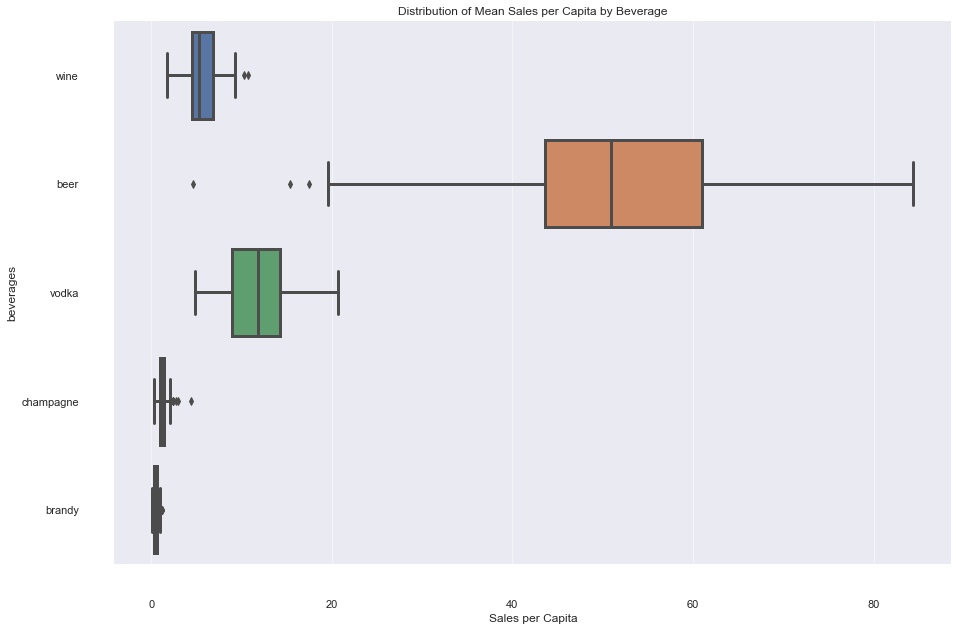

In [24]:
funcs.cat_plots(df_melt_reg, plot_type = 'boxplot')

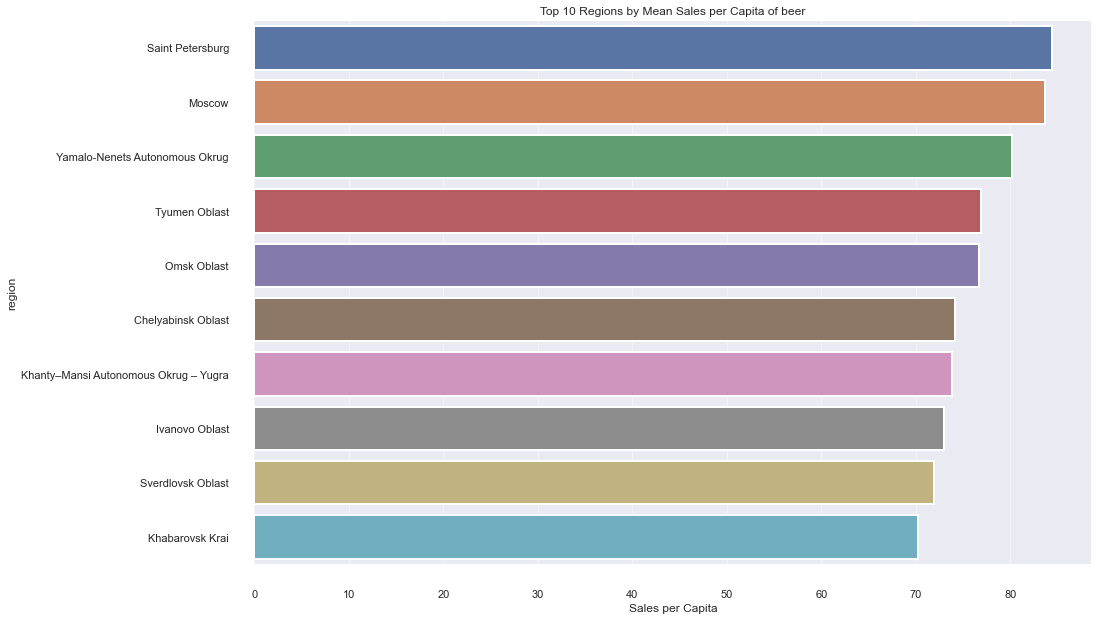

In [25]:
funcs.cat_plots(df_melt_reg, plot_type = 'barplot', n =10, beverage = 'beer')

In [26]:
funcs.cat_plots(df_melt_reg, plot_type = 'barplot', n =10)

Looking at location sales, Saint Pertersgburg tops the list followed by Moscow and Yamalo-Nenets Autonomous Okrug in third. As observed in the time series plot, beer has the most sales by region.

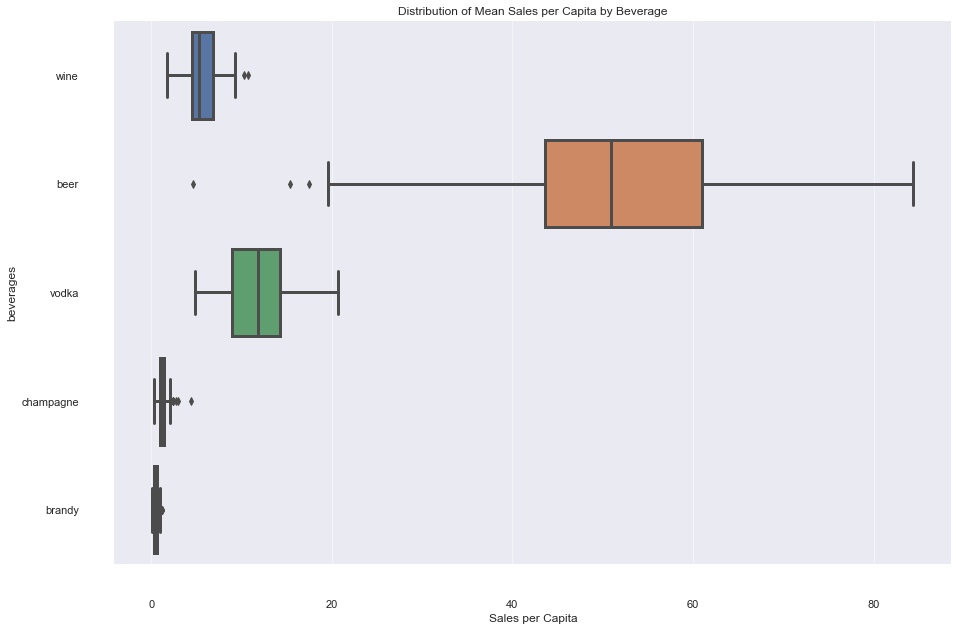

In [27]:
# Distribution plot of beverages
cat_plot(df_clean, 'boxplot')

The boxplot shows the distribution of sales per beverage. There are three regions in beer sales that are outliers outliers while you can observe 2 outlier regions in wine sales. 

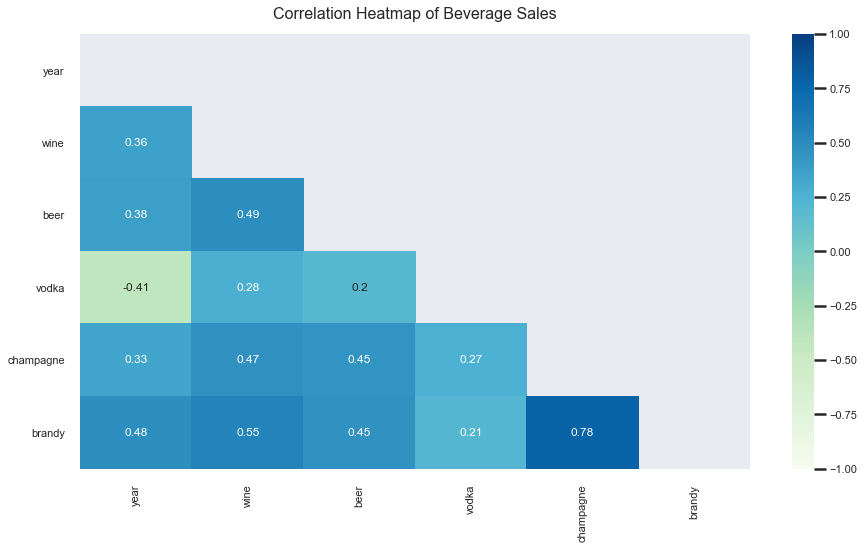

In [28]:
funcs.corr_heatmap(df_clean)

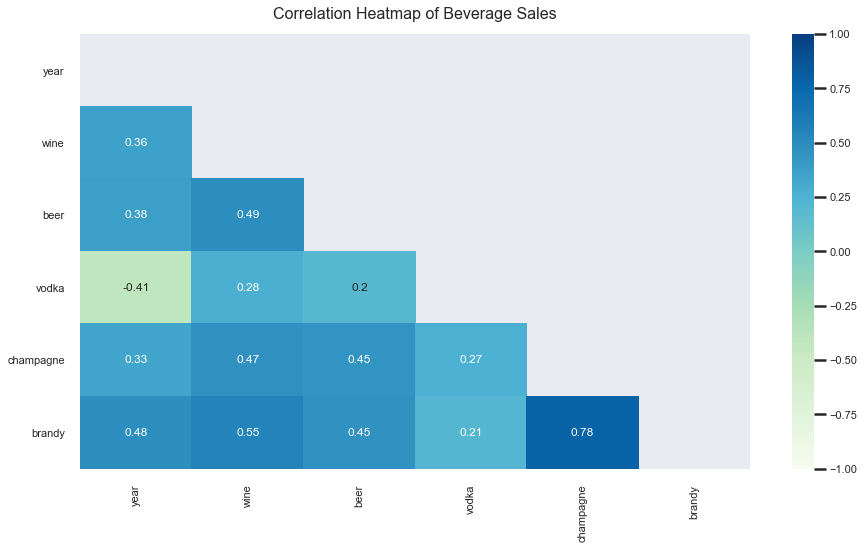

In [29]:
# Plot a correlation heat map of numerical values
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
mask = np.triu(np.ones_like(df_clean.corr(), dtype = bool))
heatmap = sns.heatmap(df_clean.corr(), mask = mask, vmin = -1, vmax = 1, annot  =True, cmap = 'GnBu')
heatmap.set_title("Correlation Heatmap of Beverage Sales", fontdict = {'fontsize': 16}, pad = 15)
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.setp(ax.get_yticklabels(), rotation = 0)
plt.savefig("images/dfcorr.png")
plt.show()

The correlation heatmap shows a strong positive relationship between brandy and champagne sales. This signifies that for every increase in one variable, there's a corresponding increase in sales of the other variable. We can also observe positive relationship between wine and brandy sales, even though not as strong as relationship between champagne and brandy.

## Machine Learning

This section will aim to solve the main ask of this project. We will use **Collaborative Filtering Method**, an unsupervised machine learning algorithm to recommend regions similar to wine sales in Saint Petersburg. 

**Collaborative Filtering Method** is one of three major methods to build a Recommender System. This method uses a similarity score to recommend items based on user interactions (Source: [Recommendation System for Streaming Platforms](https://www.datacamp.com/community/tutorials/streaming-platform-analysis)). 

The following steps will be implemented:

- Import machine learning modules
- Preprocess data for machine learning
- Compute similarity score using cosine similarity

We will create functions to preprocess the data and compute similarity scores.

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

### Preprocessing

We will scale numerical features using MinMaxScaler to have numerical values between 0 and 1. Year column will be converted to object data type

In [31]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [32]:
# preprocess data
# def preprocess_data(df):
#     # instantiate MinMaxScaler
#     scaler = MinMaxScaler(feature_range = (0, 1))
    
#     # convert year to object data type
#     df['year'] = df['year'].astype('object')
    
#     # aggregate data by region
#     df_grp = df.groupby('region', as_index = False)[['wine', 'beer', 'vodka', 'champagne', 'brandy']].mean()

#     # create dataframe of transformed features
#     df_grp[['wine', 'beer', 'vodka', 'champagne', 'brandy']] = scaler.fit_transform(df_grp[['wine', 'beer', 'vodka', 'champagne', 'brandy']])
    
#     # extract numerical data
#     df_nums = df_grp[['wine', 'beer', 'vodka', 'champagne', 'brandy']]
#     # extract numerical columns names
#     df_num_cols = df_nums.columns.tolist()
    
#     # extract all columns
#     cols_of_df = df.columns.tolist()
    
#     return df_grp, cols_of_df, df_nums, df_num_cols

In [33]:
# scaled_df, features, scaled_num_df, scaled_num_df_cols = preprocess_data(df_clean)

In [34]:
# compute the cosine similarity
cos_sim = cosine_similarity(scaled_num_df, scaled_num_df)
cos_sim

NameError: name 'scaled_num_df' is not defined

In [ ]:
# reverse mapping of indices and region names
indices = pd.Series(scaled_df.index, index = scaled_df['region'])
indices = indices.drop_duplicates()

In [ ]:
# get index corresponding to region
idx = indices['Saint Petersburg']
idx

In [ ]:
# get pairwise similarity scores
sig_scores = list(enumerate(cos_sim[idx]))
# sig_scores

In [ ]:
# sort the regions
sig_scores = sorted(sig_scores, key = lambda x: x[1], reverse = True)
# sig_scores

In [ ]:
# scores of 10 most similar regions
sig_scores = sig_scores[1:11]
sig_scores

In [ ]:
# region indices
region_indices = [i[0] for i in sig_scores]

In [ ]:
# get 10 most similar regions
scaled_df['region'].iloc[region_indices]

In [ ]:
# def recommend_regions(df, region, n, **kwargs):

#     grp_v_single_beverages = kwargs.get('grp_v_single_beverages', None)
    
#     df_grp, cols_of_df, df_nums, df_num_cols = preprocess_data(df)
    
#     # compute the cosine similarity
#     cos_sim = cosine_similarity(df_nums, df_nums)
#     # reverse mapping of indices and region names
#     indices = pd.Series(scaled_df.index, index = df_grp['region'])
#     indices = indices.drop_duplicates()
#     # get index corresponding to region
#     idx = indices[region]
#     # get pairwise similarity scores
#     sig_scores = list(enumerate(cos_sim[idx]))
#     # sort the regions
#     sig_scores = sorted(sig_scores, key = lambda x: x[1], reverse = True)
#     # scores of n most similar regions
#     sig_scores = sig_scores[1:n+1]
#     # region indices
#     region_indices = [i[0] for i in sig_scores]
#     # get n most similar regions
#     top_n = df_grp['region'].iloc[region_indices]
    
#     # generate scores for a single beverage
#     if grp_v_single_beverages:
#         df_grp_bev = df_nums[grp_v_single_beverages]
#         # compute the cosine similarity
#         cos_sim = cosine_similarity(df_grp_bev, df_grp_bev)
#         # reverse mapping of indices and region names
#         indices = pd.Series(scaled_df.index, index = df_grp['region'])
#         indices = indices.drop_duplicates()
#         # get index corresponding to region
#         idx = indices[region]
#         # get pairwise similarity scores
#         sig_scores = list(enumerate(cos_sim[idx]))
#         # sort the regions
#         sig_scores = sorted(sig_scores, key = lambda x: x[1], reverse = True)
#         # scores of n most similar regions
#         sig_scores = sig_scores[1:n+1]
#         # region indices
#         region_indices = [i[0] for i in sig_scores]
#         # get n most similar regions
#         top_n = df_grp['region'].iloc[region_indices]
    
#     return top_n

In [ ]:
# recommend_regions(df_clean, 'Saint Petersburg', 10)

In [ ]:
df_grp, cols_of_df, df_nums, df_num_cols, cos_sim = funcs.preprocess_data(df_clean)

In [ ]:
top_n = funcs.recommend_regions(df_grp, 'Saint Petersburg', 10, cos_sim)
top_n